# Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Loading and manipulating data


In [2]:
newdataset = pd.DataFrame()
temp = pd.DataFrame()
dataset = pd.read_csv('data20202021.csv')
N = 779094 #ND Popluation in April 1st 2020

In [3]:
days = int(len(dataset.index)/54)
for j in range(0,days):
    for i in range(1+54*j,54+54*j):
        dataset.loc[i,:]=dataset.loc[i-1,:] + dataset.loc[i,:]
        temp=dataset[i:i+1]
    newdataset=pd.concat([newdataset,temp])
    newdataset.iloc[j,-1]=j+1
    temp = temp[0:0]

In [4]:
newdataset.head(60)

,COUNTY,Total Active Cases,Total Recovered,Total Deaths,Date
53,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,106,11,0,1
107,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,110,10,0,2
161,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,114,9,0,3
215,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,131,4,0,4
269,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,138,10,1,5
323,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,138,12,0,6
377,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,140,12,0,7
431,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,142,15,1,8
485,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,142,7,2,9
539,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,148,9,0,10


In [5]:
newdataset.shape

(640, 5)

In [6]:
for i in range(1,len(newdataset.index)):
    newdataset.iloc[i,2:4]=newdataset.iloc[i,2:4] + newdataset.iloc[i-1,2:4]
    

In [7]:
newdataset

,COUNTY,Total Active Cases,Total Recovered,Total Deaths,Date
53,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,106,11,0,1
107,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,110,21,0,2
161,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,114,30,0,3
215,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,131,34,0,4
269,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,138,44,1,5
...,...,...,...,...,...
34343,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,1760,167959,2017,636
34397,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,1729,168630,2018,637
34451,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,1690,169435,2019,638
34505,AdamsBarnesBensonBillingsBottineauBowmanBurkeB...,1931,169978,2024,639


In [8]:
I = newdataset.iloc[:,1:2].values
recovered = newdataset.iloc[:,2:3].values
death = newdataset.iloc[:,3:4].values
R = recovered + death
date = newdataset.iloc[:,4:5]

In [9]:
print(I.max())

10456


In [10]:
print(len(newdataset.index))

640


# Math Formula


In [11]:
import math
df = pd.DataFrame()

In [12]:
for i in range(1,len(newdataset.index)):
    Rnot=((-2*N)/(R[i]-R[i-1])) * (((N-I[i]-R[i])-(N-I[i-1]-R[i-1]))/((N-I[i]-R[i])+(N-I[i-1]-R[i-1])))
    gamma=(math.log(1+(((R[i]-R[i-1])*(Rnot*((N-I[i-1]-R[i-1])/N)-1))/(I[i-1]))))/(Rnot*((N-I[i-1]-R[i-1])/N)-1)
    df.loc[i-1,'rnot']=Rnot
    df.loc[i-1,'gamma']=gamma

In [13]:
df.iloc[:,-1]

0      0.092603
1      0.080366
2      0.032706
3      0.081803
4      0.086956
         ...   
634    0.195146
635    0.385183
636    0.471436
637    0.303086
638    0.346462
Name: gamma, Length: 639, dtype: float64

In [14]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.shape

(639, 2)

In [15]:
df

,rnot,gamma
0,1.400223,0.092603
1,1.444699,0.080366
2,5.251041,0.032706
3,1.636729,0.081803
4,1.000243,0.086956
...,...,...
634,1.572374,0.195146
635,1.224230,0.385183
636,1.222753,0.471436
637,1.852390,0.303086


In [16]:
df.loc[:,'beta'] = df.loc[:,'rnot'] * df.loc[:,'gamma']

In [17]:
df

,rnot,gamma,beta
0,1.400223,0.092603,0.129665
1,1.444699,0.080366,0.116104
2,5.251041,0.032706,0.171738
3,1.636729,0.081803,0.133889
4,1.000243,0.086956,0.086978
...,...,...,...
634,1.572374,0.195146,0.306842
635,1.224230,0.385183,0.471553
636,1.222753,0.471436,0.576450
637,1.852390,0.303086,0.561433


In [18]:
df['gamma'].max()

0.47143593741424655

In [19]:
gamma1 = df['gamma'].mean()
beta1 = df['beta'].mean()

In [20]:
gamma1=0.19
beta1=0.39

# Graphing SIR Model


In [28]:
I0 = 106
R0 = 10
N = 779094
S0 = N - I0 - R0

In [29]:
print(beta1,gamma1, N)

0.14035489184752414 0.12068094295195622 779094


In [30]:
t=np.linspace(0,len(newdataset.index),len(newdataset.index))

def deriv(y,t,N,beta1,gamma1):
    S, I, R = y
    dSdt = -beta1 * S * I / N
    dIdt = beta1 * S * I / N - gamma1 * I
    dRdt = gamma1 * I
    return dSdt, dIdt, dRdt

In [31]:
y0= S0, I0, R0
timegrid = odeint (deriv, y0, t, args=(N, beta1, gamma1))
S, I, R = timegrid.T

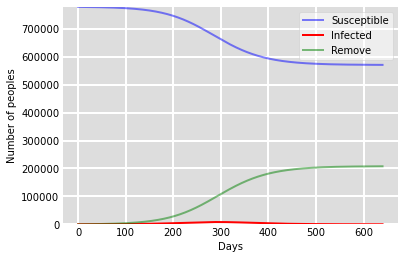

In [32]:
sir = plt.figure(facecolor='w')
index = sir.add_subplot(111,facecolor='#dddddd', axisbelow=True)
index.plot(t, S, 'b', alpha=0.5,lw=2,label='Susceptible')
index.plot(t, I, 'r', alpha=1,lw=2,label='Infected')
index.plot(t, R, 'g', alpha=0.5,lw=2,label='Remove')
index.set_xlabel('Days')
index.set_ylabel('Number of peoples')
index.set_ylim(0,N)
index.grid(b=True,which='major',c='w',lw=2,ls='-')
index.yaxis.set_tick_params(length=0)
index.xaxis.set_tick_params(length=0)
legend = index.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','bottom','left'):
    index.spines[spine].set_visible(False)
plt.show()

In [33]:
print(gamma1)

0.12068094295195622


# Test set


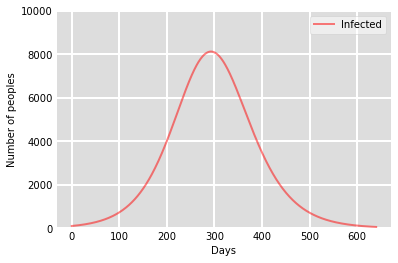

In [34]:
sir = plt.figure(facecolor='w')
index = sir.add_subplot(111,facecolor='#dddddd', axisbelow=True)
#index.plot(t, S, 'b', alpha=0.5,lw=2,label='Susceptible')
index.plot(t, I, 'r', alpha=0.5,lw=2,label='Infected')
#index.plot(t, R, 'g', alpha=0.5,lw=2,label='Remove')
index.set_xlabel('Days')
index.set_ylabel('Number of peoples')
index.set_ylim(0,10000)
index.grid(b=True,which='major',c='w',lw=2,ls='-')
index.yaxis.set_tick_params(length=0)
index.xaxis.set_tick_params(length=0)
legend = index.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top','right','bottom','left'):
    index.spines[spine].set_visible(False)
plt.show()